#### Дан датасет со значениями веса и роста человека.
#### Построить линейную регрессионную модель, предсказывающую рост человека по его весу.
#### Дополнительно, оценить ее качество на данном датасете.

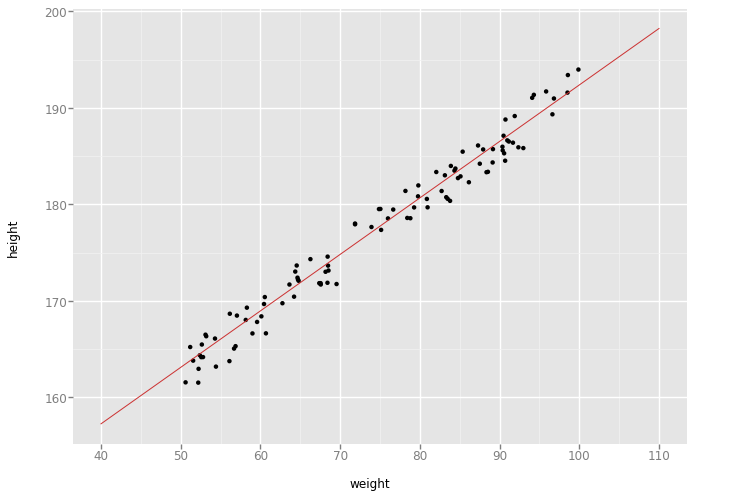

mean: 1.2733716626576799, std: 0.20881297915022842
y = 0.59*x + (133.84)
Score on the train set: 0.97
Score on the test set: 0.97


In [2]:
import pandas as pd 
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, linear_model, metrics
from ggplot import *

#%pylab inline

frame = pd.read_csv('dataset.csv', header = 0)
#frame.head() 

height = frame.as_matrix(columns = frame.columns[0:1])
weight = frame.as_matrix(columns = frame.columns[1:])

frame = frame[['weight', 'height']]

#frame.head() 
#ggplot(aes(x= "weight", y="height"), data=frame) + geom_point()


# Split data to train and test sets
train_weight, test_weight, train_height, test_height = cross_validation.train_test_split(weight, height,
                                                                                         test_size = 0.3)

# Create Linear Regressino Model
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_weight, train_height)
predictions = linear_regressor.predict(test_weight)


#metrics.mean_absolute_error(test_height,predictions)


# Create score metric
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)
linear_scoring = cross_validation.cross_val_score(linear_regressor, weight, height, scoring = scorer, 
                                                  cv = 10)

# Create score metric
gg = ggplot(aes(x= "weight", y="height"), data=frame) + geom_point()

#y = mx + b ;
m = linear_regressor.coef_[0][0]
b = linear_regressor.intercept_[0]

gg += geom_abline(intercept=b, slope = m, color="#CC3333")
gg.show()

print ('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()) )


print ("y = {:.2f}*x + ({:.2f})".format(linear_regressor.coef_[0][0], 
                                                  linear_regressor.intercept_[0]) )

print ("Score on the train set: {:.2f}".format(linear_regressor.score(train_weight, train_height)) )
print ("Score on the test set: {:.2f}".format(linear_regressor.score(test_weight, test_height)) )
